In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/thyroid_cancer_risk_data.csv")

In [3]:
def check_df(dataframe):
    print("*******************INFO*******************")
    print(df.info())
    print("*******************HEAD*******************")
    print(df.head())
    
check_df(df)

*******************INFO*******************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          2126

In [4]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols, num_cols, cat_but_car

(['Gender',
  'Country',
  'Ethnicity',
  'Family_History',
  'Radiation_Exposure',
  'Iodine_Deficiency',
  'Smoking',
  'Obesity',
  'Diabetes',
  'Thyroid_Cancer_Risk',
  'Diagnosis'],
 ['Patient_ID', 'Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size'],
 [])

In [5]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

        Gender      Ratio
Gender                   
Female  127527  59.958813
Male     85164  40.041187
##########################################


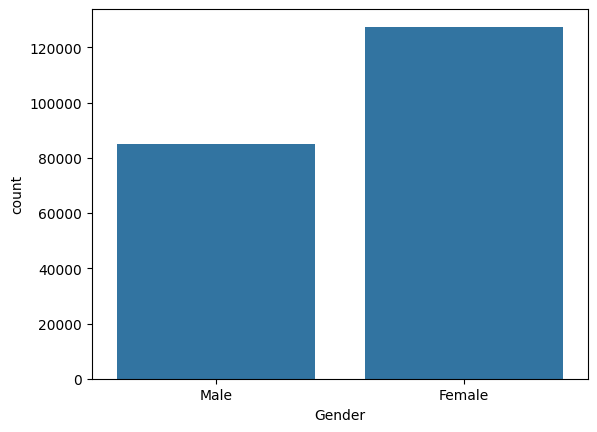

None
             Country      Ratio
Country                        
India          42496  19.980159
China          31978  15.034957
Nigeria        31918  15.006747
Brazil         21413  10.067657
Russia         21297  10.013118
Japan          16867   7.930284
South Korea    14965   7.036029
UK             10642   5.003503
USA            10558   4.964009
Germany        10557   4.963539
##########################################


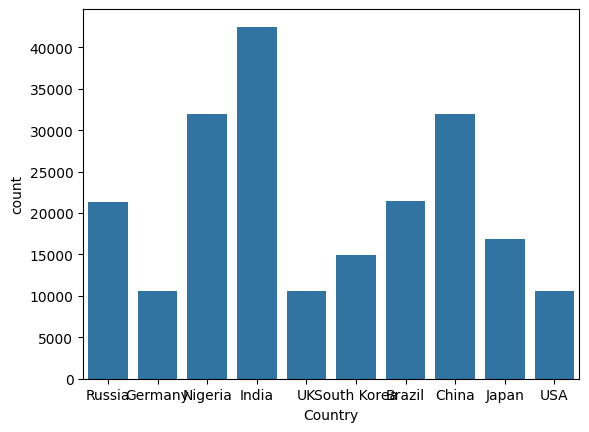

None
                Ethnicity      Ratio
Ethnicity                           
Caucasian           63669  29.934976
Asian               53261  25.041492
African             42414  19.941605
Hispanic            32012  15.050942
Middle Eastern      21335  10.030984
##########################################


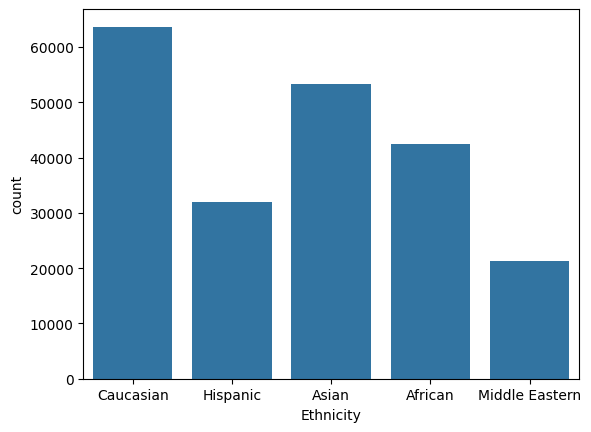

None
                Family_History      Ratio
Family_History                           
No                      148866  69.991678
Yes                      63825  30.008322
##########################################


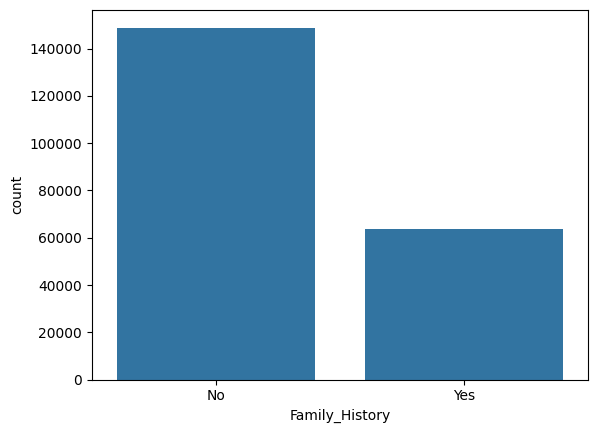

None
                    Radiation_Exposure      Ratio
Radiation_Exposure                               
No                              180831  85.020523
Yes                              31860  14.979477
##########################################


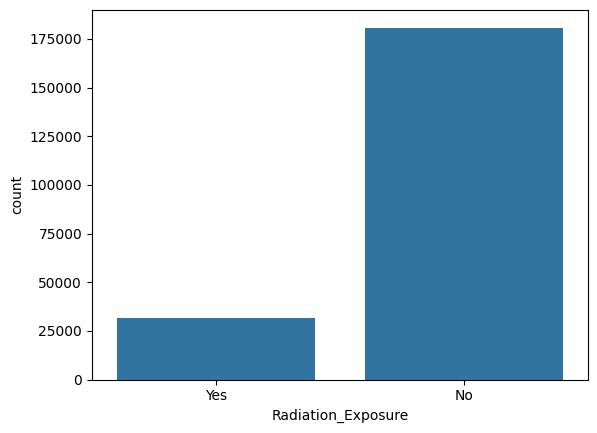

None
                   Iodine_Deficiency      Ratio
Iodine_Deficiency                              
No                            159673  75.072758
Yes                            53018  24.927242
##########################################


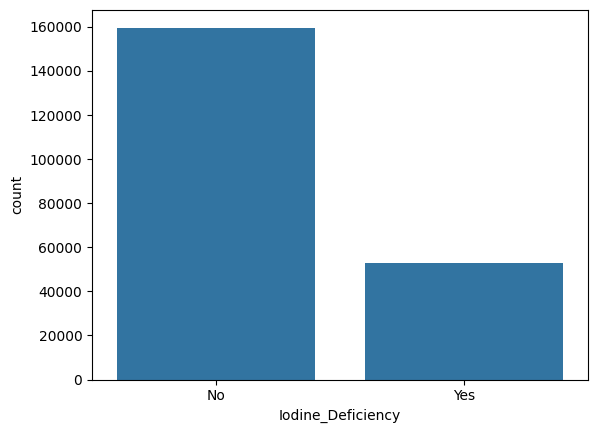

None
         Smoking      Ratio
Smoking                    
No        170260  80.050402
Yes        42431  19.949598
##########################################


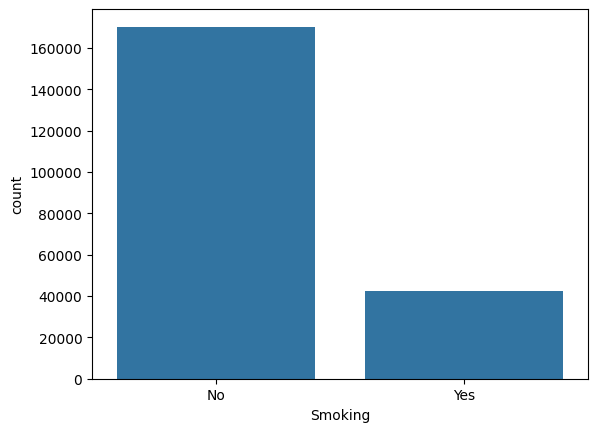

None
         Obesity      Ratio
Obesity                    
No        148805  69.962998
Yes        63886  30.037002
##########################################


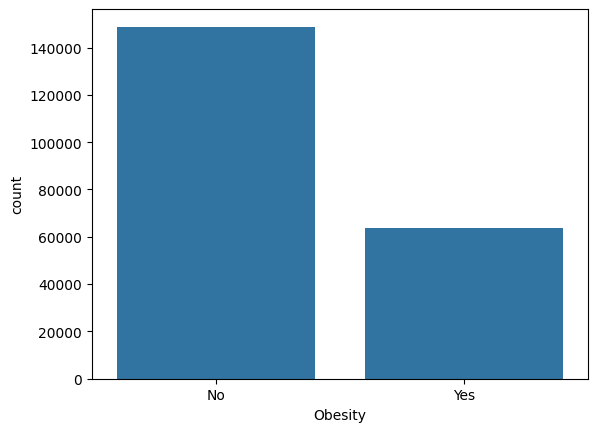

None
          Diabetes      Ratio
Diabetes                     
No          170098  79.974235
Yes          42593  20.025765
##########################################


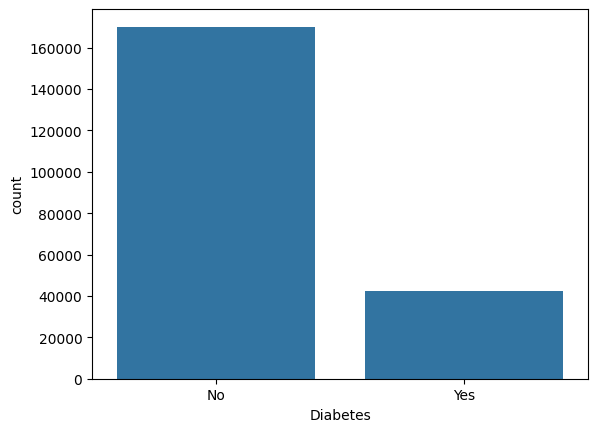

None
                     Thyroid_Cancer_Risk      Ratio
Thyroid_Cancer_Risk                                
Low                               108388  50.960313
Medium                             72400  34.039992
High                               31903  14.999694
##########################################


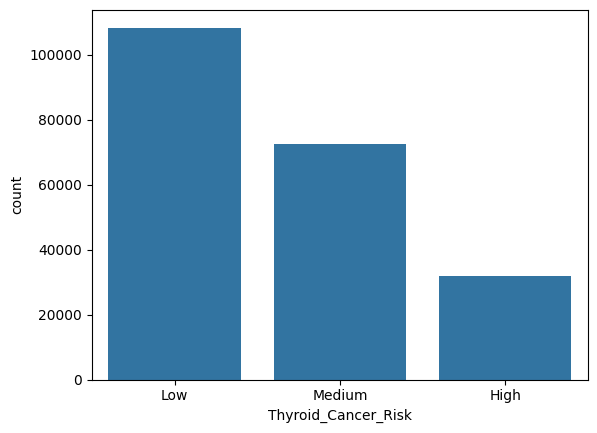

None
           Diagnosis      Ratio
Diagnosis                      
Benign        163196  76.729152
Malignant      49495  23.270848
##########################################


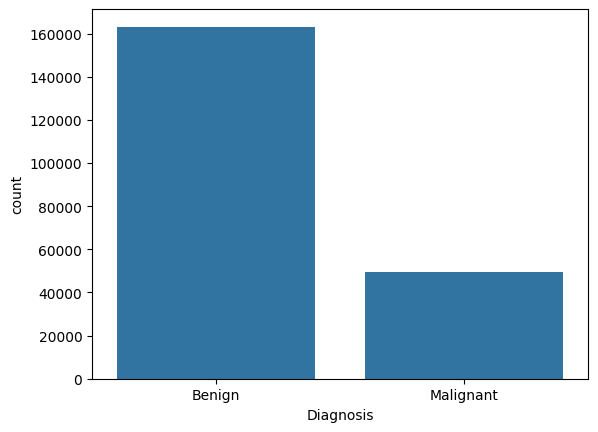

None


In [6]:
for col in cat_cols:
    print(cat_summary(df,col,True))

In [7]:
for col in num_cols:
    num_summary(df, col, plot=True)

count    212691.00000
mean     106346.00000
std       61398.74739
min           1.00000
5%        10635.50000
10%       21270.00000
20%       42539.00000
30%       63808.00000
40%       85077.00000
50%      106346.00000
60%      127615.00000
70%      148884.00000
80%      170153.00000
90%      191422.00000
95%      202056.50000
99%      210564.10000
max      212691.00000
Name: Patient_ID, dtype: float64
count    212691.000000
mean         51.918497
std          21.632815
min          15.000000
5%           18.000000
10%          22.000000
20%          29.000000
30%          37.000000
40%          44.000000
50%          52.000000
60%          59.000000
70%          67.000000
80%          74.000000
90%          82.000000
95%          86.000000
99%          89.000000
max          89.000000
Name: Age, dtype: float64
count    212691.000000
mean          5.045102
std           2.860264
min           0.100000
5%            0.590000
10%           1.090000
20%           2.060000
30%           3

In [8]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [9]:
for col in num_cols:
    target_summary_with_num(df, "Diagnosis", col)

              Patient_ID
Diagnosis               
Benign     106385.087845
Malignant  106217.118699


                 Age
Diagnosis           
Benign     51.917124
Malignant  51.923023


           TSH_Level
Diagnosis           
Benign      5.049307
Malignant   5.031236


           T3_Level
Diagnosis          
Benign     2.002866
Malignant  1.997971


           T4_Level
Diagnosis          
Benign     8.244755
Malignant  8.250981


           Nodule_Size
Diagnosis             
Benign        2.505518
Malignant     2.496432




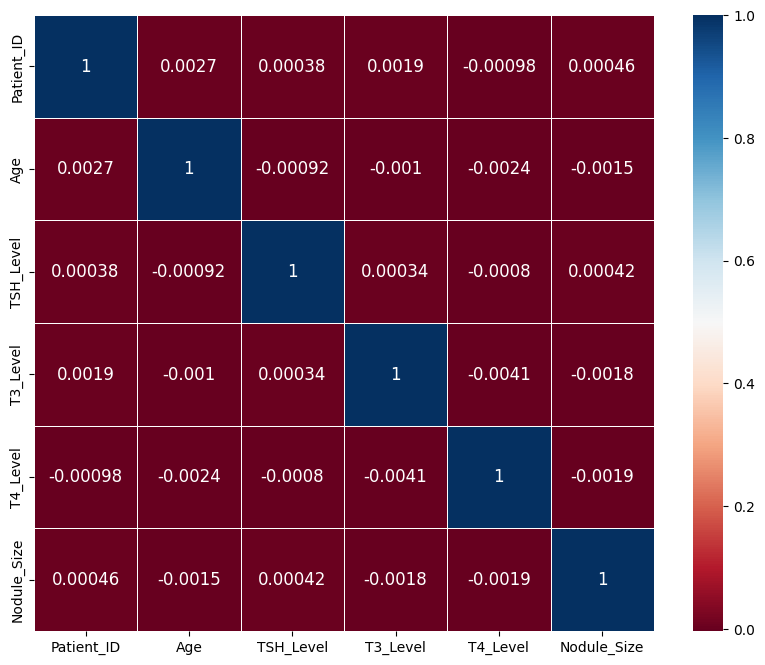

In [10]:
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[num_cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

In [11]:
df = pd.get_dummies(df, columns=["Country"], drop_first=False)
df.head()

,Patient_ID,Age,Gender,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,...,Country_Brazil,Country_China,Country_Germany,Country_India,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA
0,1,66,Male,Caucasian,No,Yes,No,No,No,No,...,False,False,False,False,False,False,True,False,False,False
1,2,29,Male,Hispanic,No,Yes,No,No,No,No,...,False,False,True,False,False,False,False,False,False,False
2,3,86,Male,Caucasian,No,No,No,No,No,No,...,False,False,False,False,False,True,False,False,False,False
3,4,75,Female,Asian,No,No,No,No,No,No,...,False,False,False,True,False,False,False,False,False,False
4,5,35,Female,African,Yes,Yes,No,No,No,No,...,False,False,True,False,False,False,False,False,False,False


In [12]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols, num_cols, cat_but_car

(['Gender',
  'Ethnicity',
  'Family_History',
  'Radiation_Exposure',
  'Iodine_Deficiency',
  'Smoking',
  'Obesity',
  'Diabetes',
  'Thyroid_Cancer_Risk',
  'Diagnosis',
  'Country_Brazil',
  'Country_China',
  'Country_Germany',
  'Country_India',
  'Country_Japan',
  'Country_Nigeria',
  'Country_Russia',
  'Country_South Korea',
  'Country_UK',
  'Country_USA'],
 ['Patient_ID', 'Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size'],
 [])

In [13]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [14]:
df.head()

,Patient_ID,Age,Gender,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,...,Country_Brazil,Country_China,Country_Germany,Country_India,Country_Japan,Country_Nigeria,Country_Russia,Country_South Korea,Country_UK,Country_USA
0,1,66,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,29,1,3,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,86,1,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,75,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,35,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
X = df.drop(["Diagnosis"],axis=1)
y = df["Diagnosis"]

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(train_X,train_y)

y_pred = rf_model.predict(test_X)

report = classification_report(test_y, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.70      0.44      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.82      0.81     42539

